# Chapter 3: Univariate Descriptive Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

## 3.1 Introduction

Now we've covered our preliminaries, it's time to start with the second step of data analysis: ***Explorative Analysis***. Here we try to get a first look at our dataset, get a better understanding of it, so we can perform focused analyses later on.


We will also make a conceptual bridge towards probability distributions, samples and populations.

## 3.2 Intent

The goal of descriptive analysis, as the word itself says is to **describe our data**. Like this, we will later on know exactly what we will analyse further. As such, this is the way in which we perform our explorative analysis.

Concretely, ***Univariate Descriptive Analysis*** takes a look at each variable individually. No attention is yet paid to the relationships among variables. For know we simply look at 1 variable, and see exactly how that variable behaves.

Let's start by importing our data, and printing the first 5 observations:

In [2]:
pokemons = pd.read_csv('Pokemon.csv')
pokemons.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
pokemons.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

We can see several variables here. In the documentation of our dataset, we find the following explanation:

  * #: ID for each pokemon
  * Name: Name of each pokemon
  * Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
  * Type 2: Some pokemon are dual type and have 2
  * Total: sum of all stats that come after this, a general guide to how strong a pokemon is
  * HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
  * Attack: the base modifier for normal attacks (eg. Scratch, Punch)
  * Defense: the base damage resistance against normal attacks
  * SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
  * SP Def: the base damage resistance against special attacks
  * Speed: determines which pokemon attacks first each round

In Univariate Descriptive Analysis, we wil look at all of these variables individually and check whether they contain information, and more or less how they behave. Luckily, as you know from last lesson, pandas provides us with an initial view:

In [ ]:
pokemons.describe()

We can clearly see that only numerical variables are summarized. This makes sense, as no operation can take place on string typed variables. Before we go any further, it might be interesting to encode certain variables to for example booleans.

The first metric we see is *'count'*. This simply states how many observations we have for each variable. We see that all variables have got 800 observations. This is a good sign. Should there be any variable with less observations than the other variable, we have missing values. There are multiple ways to solve this. As seen in the previous lesson, there are 2 main ways to fix missing values

* The observations with missing variables should be omitted (column or row wise depending on the amount that is misssing in each column/row)
* The missing values should be filled (in a meaningfull matter)

The tricky part in this is that 'a meaningfull manner' is not very well defined and will depend on the data and the problem to be solved. 

Secondly, we can also observe a minimum and maximum vale for each variable. This already indicates the range of each variable. For example: the attack value of each pokemon lies somewhere between 5 and 190. This once again makes sense, however in other datasets we might here encounter unlogical values. Such as a negative attack. These observations then once again need to be filtered out. 

Problem! This first step already requires common sense and/or some form of knowledge of the data to avoid working with crappy/wrong data. 

## 3.4 Graphical Representations

Now we've gotten a broad view of our data, it is time to look at each variable independently. We'll take the example of descriptively analyzing the "Total" variable, but this process should obviously be repeated for every variable!

We'll make our first distribution plot, or "histogram" in order to visualize this variable. On the horizontal axis we will find all possible values of said variable, and on the vertical axis we denote how many times this value has occured.

In [ ]:
plt.hist(pokemons["Total"], density=False, bins=50, label = 'Total', alpha = 0.5);  
plt.legend();


## 3.4 Numerical Metrics

Obviously, simply plotting variables isn't enough. We do need some kind of objective metrics to represent basic information about our data.

### 3.4.1 Measures of Central Tendency (centrum vn de data)

The first numerical metric we'll take a look at are measures of central tendendy. The question we're trying to answer is the following:

"***Where is the center of the data situated?***"

#### Mean, average, gemiddelde

The first, and most straightforward measure of central tendency is the mean, or otherwise known as the average. It is quite simply calculated as follows:



$$ \overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i} = \frac{x_1 + x_2 + \cdots + x_n}{n} $$


The sum of all values is calculated, and is then divided by the amount of observations. Simple as it may be, it is even more straightforward to calculate:

In [4]:
mean = np.mean(pokemons)
mean#.Total

/Users/Charlie/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


#             362.81375
Total         435.10250
HP             69.25875
Attack         79.00125
Defense        73.84250
Sp. Atk        72.82000
Sp. Def        71.90250
Speed          68.27750
Generation      3.32375
Legendary       0.08125
dtype: float64

In [ ]:
pokemons['Total'].mean()

From this, we can say that the average Total score of all observations is 435. It is always interesting to compare this with the minimum and maximum values. We see that the average value is about in the middle between the minimum and maximum. 

Is the mean however a good metric of central tendency in our case? Let's plot it against the histogram to check.

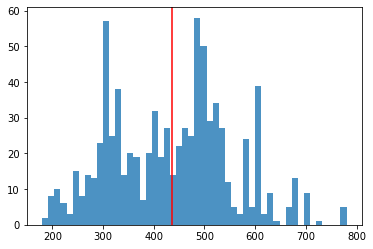

In [5]:
plt.hist(pokemons["Total"], bins = 50, alpha = 0.8)
plt.axvline(mean.Total, 0, 150, color="r")
plt.show()

There are different cases in which the mean is less than optimal. One of those is the presence of outliers: the mean is extremely sensitive to outliers. The median, which we will see later, offers a solution to this. Another issue is multiple peakedness. This is the presence of multiple "centers". This setting is much harder to describe and needs to be detected graphically.

In our histogram, we can clearly see two centers: one around 500, and one around 300. Together with the values between these two, the center of our variable is formed. As such, the mean is in this case a fairly good measure. It may however be interesting to also calculate the mode and the mean. 

Remark: data needs to be continuous for the mean to be meaniful.

#### Median

The median is the second measure of central tendency we *always* calculate when studying a variable. It is calculated fairly easily: we'll put all our observations next to each other in an ordered fashion. We then simply pick the middle one. As such, it is also extremely easy to calculate:

In [6]:
median = np.median(pokemons["Total"])
print(median)

450.0


As we have mentioned above, the median is much more robust against outliers. When comparing, we can see that our mean and median are quite close together. This indicates that 

1. There are not much outliers, if any
2. The distribution is more or less symmetric

Let's see if we can check that in the histogram:

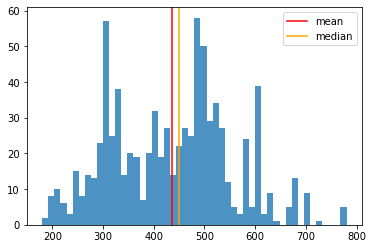

In [7]:
plt.hist(pokemons["Total"], bins = 50, alpha = 0.8)
plt.axvline(pokemons["Total"].mean(), 0, 150, label = "mean", color = "red")
plt.axvline(pokemons["Total"].median(), 0, 150, label = "median", color = "orange")
plt.legend()
plt.show()

We indeed see that the mean and median are really close together. We have obtained an additional indication that the center of our data is indeed somewhere around 435-450. If these two measures fall more or less together, it's a first evidence that we have indeed found the center of our dataset.

Remark: data needs to be at least ordinal for the median to make sense.

### 3.4.2 Measures of Dispersion, (spreiding)

Next to getting an idea of where the center of our data is, it might be interesting to get a formal idea about how "spread out" our data is. The question we ask ourselves is the following:

"***If we were to take a random observation, how far away would it lie from the center of the data?***"

#### Variance

The first measures of dispersion is are the variance and standard deviation. These measures are build on top of the mean, and as such can only be calculated for the variable types for which we can calculate the mean!

When calculating the variance, we first calculate for each observation the distance it lies from the mean. We then simply take the average of all these distances. As such, it represents the average distance from the mean.

The formula is as follows:

$$ S^2 = 
            \frac{\sum_{i=1}^n(x_i - \overline{x})^2}{n-1} $$
            
            
$$ StdDev = 
            \sqrt{S^2} = S $$  

It is clear that the standard deviation and the variance contain the exact same information. As such, we only need to calculate one of both!

In [8]:
variance = np.var(pokemons["Total"])
stdev = np.sqrt(variance)
print(stdev)

119.88803941073523


In [9]:
np.std(pokemons["Total"])

119.88803941073523

We conclude that on average, an observation will lie about 120 points away from the mean. There will definitely also be points closer to the mean and points farther away from the mean. This is simpy a general metric which indicates the average distance from the mean. Next to that, it also tells us nothing about on which side of the mean an observation will lie. It simply tells us how dispersed our data is.

#### Percentiles

The second measure of disperson are the percentiles. Remember when we calculated the median, that we first ordered all our observations and then picked the middle one. This implies that there exist exactly 50% of our observations left from the median, and the other half of our dataset will be higher than the median. Percentiles are nothing more that a generalization of this concept. Rather than cutting our dataset in 2 parts by selecting the middle value, we can cut our dataset in 2 by selecting a certain percentage of observations the number must cut.

For example: the 1st percentile is the number for which 1% of our observations is lower, and 99$ percent of our dataset is higher. As such, the median can be seen as the 50th percentile.

Let's calculate some percentiles:

In [ ]:
percentile_01 = np.percentile(pokemons["Total"], 1)
percentile_99 = np.percentile(pokemons["Total"], 99)
median = np.percentile(pokemons["Total"], 50)
print(percentile_01)

From this, we can for example say that 99% of all observations are higher than 200. 1% of the observations is however even lower than 200, so it's not yet the minimum value.

There exist a few special percentiles:

* $Q1$ = the 25th percentile
* $Q2$ = the 50th percentile (the median)
* $Q3$ = the 75th percentile

There is also the **interquartile range (IQR)**, this is a measure of dispersion based on the percentile/quartiles: $IQR$ = $Q_3$ − $Q_1$

These quartiles are used to construct the box in the boxplot:

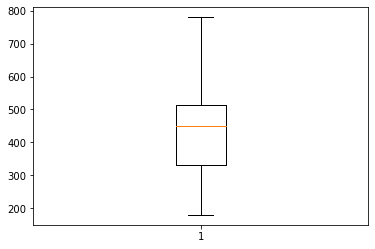

In [10]:
plt.boxplot(pokemons["Total"]);

However, there is much more to this boxplot. For this let's examine the following visualisation (https://stats.stackexchange.com/questions/149161/confused-by-location-of-fences-in-box-whisker-plots/149178#149178)

Note: The default k = 1.5

![boxplot info](boxplot.png)

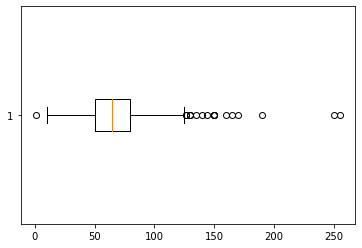

In [11]:
plt.boxplot(pokemons["HP"], vert = False);

''

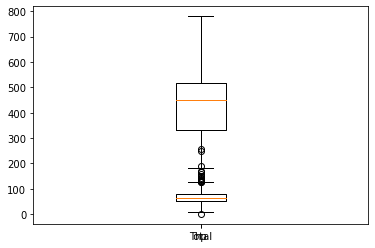

In [12]:
plt.boxplot(pokemons["HP"], labels = ["hp"])
plt.boxplot(pokemons["Total"], labels = ["Total"])
;

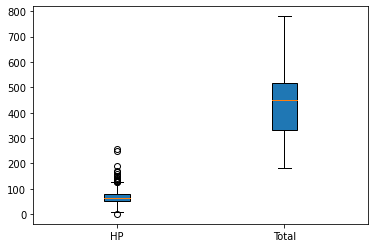

In [13]:
boxplot_data_list = [pokemons["HP"],
                    pokemons["Total"]]

boxplot_data_labels = ['HP', "Total"]

plt.boxplot(boxplot_data_list, labels = boxplot_data_labels, patch_artist=True);

### 3.4.3 Other



Other measures obviously also exist. For example, the Kurtosis measures the skewness of a distribution. We however won't go too deep into this anymore.

## 3.5 Exercises 



### 3.5.1 Exercise: boxplots vs histograms

Compare the variables 'Total', 'HP' and 'Generation'. Which of these variabes has the highest/lowest mean, median, and SD. Solve this question by making two differen visualisations:

1. histograms
2. boxplots

Do you prefer any of the two and why?

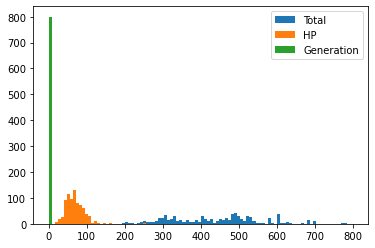

In [19]:
plt.hist(pokemons['Total'], label = "Total", bins = 100, range = [0,800]) 
plt.hist(pokemons['HP'], label = "HP", bins = 100, range = [0,800]) 
plt.hist(pokemons['Generation'], label = "Generation", bins = 100, range = [0,800]) 
plt.legend();

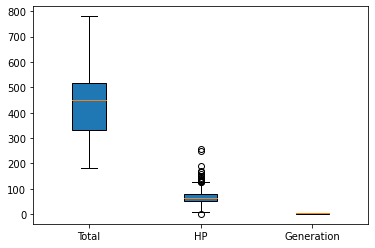

In [20]:
boxplot_data_list = [pokemons["Total"],
                    pokemons["HP"],
                    pokemons["Generation"]]

boxplot_data_labels = ["Total", 'HP', "Generation"]

plt.boxplot(boxplot_data_list, labels = boxplot_data_labels, patch_artist=True);

### 3.5.2 Exercise: boxplots vs histograms pt 2

Do the same as the excercise above but compare the variables 'HP', 'Attack', 'Defense' and 'Speed'. 

Which type of visualisation do you prefer in this case?

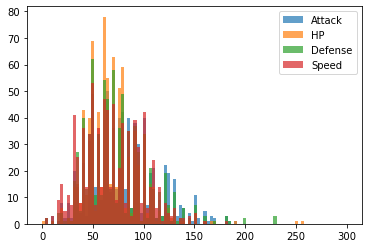

In [23]:
plt.hist(pokemons['Attack'], label = "Attack", bins = 100, range = [0,300], alpha = 0.7) 
plt.hist(pokemons['HP'], label = "HP", bins = 100, range = [0,300], alpha = 0.7) 
plt.hist(pokemons['Defense'], label = "Defense", bins = 100, range = [0,300], alpha = 0.7) 
plt.hist(pokemons['Speed'], label = "Speed", bins = 100, range = [0,300], alpha = 0.7) 
plt.legend();

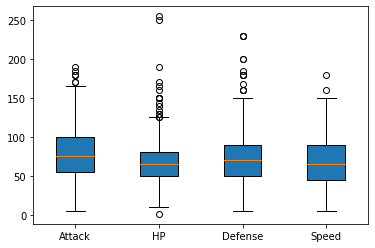

In [24]:
boxplot_data_list = [pokemons["Attack"],
                    pokemons["HP"],
                    pokemons["Defense"],
                    pokemons["Speed"]]

boxplot_data_labels = ['Attack', "HP", "Defense", "Speed"]

plt.boxplot(boxplot_data_list, labels = boxplot_data_labels, patch_artist=True);

# Air crash data

In [47]:
crash = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Proporties
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",0.500
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1.000
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1.000
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,0.700
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",0.875
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,1.000
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,1.000
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,1.000


## Excercise: Compare Aeroflot with Military - U.S. Air Force 




### Exercise 1: 
Make a histogram of both datasets and compare.

### Exercise 2: 
Make a boxplot to comppare the data. Does this give you any more information.

-Which one has one average more deaths?
-Do the medians tell the same story?
-What about the standard deviation/IQR


### Exercise 3: 
Calculate the proportion of passengers killed in the crash. Make a boxplot out of this data for both US military and Aeroflot. What can you conclude


### Exercise 4 (optional):
Make a scatterplot of fatalities over time (you can use pd.to_datetime on the date variable to plot it correctly). Do the number of fatalities improve over time or not, compare once again US military vs Aeroflot.
